Cari salah satu data di kaggle.com, kemudian lakukan eksplorasi dengan 

1. Statistik Deskriptif (mean, median, modus, varian, standar deviasi)
2. Visualisasi untuk beberapa variabel/feature dengan variabel yang sesuai
3. Correlation analysis dari 2 feature/variabel dengan pearson correlation dan visualisasi yang sesuai. Lakukan untuk 3 pasangan feature - target.

# **1. Impor Data ke Library**

Data yang digunakan adalah data player basket Counter Strike:Global Offensive (CSGO) yang diambil dari kaggle.com. Link Database : https://www.kaggle.com/patrasaurabh/csgo-player-and-team-stats

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path = "/content/player_stats.csv"
df = pd.read_csv(path)
df

,Unnamed: 0,name,country,teams,total_maps,total_rounds,kd_diff,kd,rating
0,0,ZywOo,France,"['Vitality', 'aAa']",854,22399,5248,1.38,1.28
1,1,s1mple,Ukraine,"['Natus Vincere', 'FlipSid3']",1429,37717,8070,1.33,1.25
2,2,deko,Russia,['1WIN'],190,5096,1250,1.42,1.24
3,3,saffee,Brazil,['paiN'],202,5383,1211,1.37,1.24
4,4,sh1ro,Russia,"['Gambit', 'Gambit Youngsters']",744,19780,4593,1.43,1.22
...,...,...,...,...,...,...,...,...,...
1864,1864,SPAMMER,United States,"['Variance', 'Rap Gang', 'Levitate', 'Under 21']",135,3458,-756,0.70,0.74
1865,1865,valens,United States,"['Complexity', 'Complexity', 'Nihilum', 'ImPer...",251,6594,-1459,0.69,0.74
1866,1866,breaker,Australia,"['munyanyo', 'seadoggs', 'Rooster']",132,3160,-749,0.69,0.73
1867,1867,frgd,Indonesia,['nxl'],130,3196,-822,0.65,0.70


# **2. Eksplorasi Data Dasar**

Eksplorasi data dasar dimulai dengan menginspeksi kolom berserta beberapa baris awal dari data.

In [ ]:
df.head()

,Unnamed: 0,name,country,teams,total_maps,total_rounds,kd_diff,kd,rating
0,0,ZywOo,France,"['Vitality', 'aAa']",854,22399,5248,1.38,1.28
1,1,s1mple,Ukraine,"['Natus Vincere', 'FlipSid3']",1429,37717,8070,1.33,1.25
2,2,deko,Russia,['1WIN'],190,5096,1250,1.42,1.24
3,3,saffee,Brazil,['paiN'],202,5383,1211,1.37,1.24
4,4,sh1ro,Russia,"['Gambit', 'Gambit Youngsters']",744,19780,4593,1.43,1.22


In [ ]:
df.tail()

,Unnamed: 0,name,country,teams,total_maps,total_rounds,kd_diff,kd,rating
1864,1864,SPAMMER,United States,"['Variance', 'Rap Gang', 'Levitate', 'Under 21']",135,3458,-756,0.70,0.74
1865,1865,valens,United States,"['Complexity', 'Complexity', 'Nihilum', 'ImPer...",251,6594,-1459,0.69,0.74
1866,1866,breaker,Australia,"['munyanyo', 'seadoggs', 'Rooster']",132,3160,-749,0.69,0.73
1867,1867,frgd,Indonesia,['nxl'],130,3196,-822,0.65,0.70
1868,1868,OverDrive,Russia,"['Nostalgie', 'tomorrow will be better']",132,3364,-908,0.63,0.68


Dengan menginspeksi output, dapat diambil karakteristik data antara lain :
1. Data terdiri dari 1869 baris (indeks dari 0 hingga 1868)
2. Terdapat 9 atribut di dalam data
3. Kolom ke-0 data tidak bernama yang berisi angka 0 sampai 1868
4. Kolom ke-1 berisi nama dari pemain

In [ ]:
type(df.dtypes), len(df.dtypes), df.dtypes

(pandas.core.series.Series, 9, Unnamed: 0        int64
 name             object
 country          object
 teams            object
 total_maps        int64
 total_rounds      int64
 kd_diff           int64
 kd              float64
 rating          float64
 dtype: object)

Dengan menginspeksi output, dapat diambil kesimpulan atribut yang dimilik antara lain : 
1. Kolom `name`, `country`, dan `teams` memiliki tipe data kategorikal.
2. Kolom ke-0 yang tak bernama memiliki tipe data ordinal.
3. Kolom sisanya memiliki tipe data rasio.

Karena kolom ke-0 tidak memberikan informasi yang bermakna, analisis data selanjutnya dilakukan dengan membatasi data pada semua kolom dan mengabaikan kolom ke-0.

In [ ]:
df_noid = df.iloc[:,1:]
df_noid

,name,country,teams,total_maps,total_rounds,kd_diff,kd,rating
0,ZywOo,France,"['Vitality', 'aAa']",854,22399,5248,1.38,1.28
1,s1mple,Ukraine,"['Natus Vincere', 'FlipSid3']",1429,37717,8070,1.33,1.25
2,deko,Russia,['1WIN'],190,5096,1250,1.42,1.24
3,saffee,Brazil,['paiN'],202,5383,1211,1.37,1.24
4,sh1ro,Russia,"['Gambit', 'Gambit Youngsters']",744,19780,4593,1.43,1.22
...,...,...,...,...,...,...,...,...
1864,SPAMMER,United States,"['Variance', 'Rap Gang', 'Levitate', 'Under 21']",135,3458,-756,0.70,0.74
1865,valens,United States,"['Complexity', 'Complexity', 'Nihilum', 'ImPer...",251,6594,-1459,0.69,0.74
1866,breaker,Australia,"['munyanyo', 'seadoggs', 'Rooster']",132,3160,-749,0.69,0.73
1867,frgd,Indonesia,['nxl'],130,3196,-822,0.65,0.70


Data yang ditampilkan adalah data yang diurutkan berdasarkan rating pada kolom `rating`. Selanjutnya, data akan ditampilkan dengan mengurutkan data berdasarkan negara pada kolom `country`.

In [ ]:
df1 = df_noid.sort_values(by='country',ascending=True)
df1.head(10)

,name,country,teams,total_maps,total_rounds,kd_diff,kd,rating
1078,sinnopsyy,Albania,"['BLINK', 'BLINK', 'Secret']",429,11522,-365,0.96,0.97
349,juanflatroo,Albania,"['BLINK', 'BLINK', 'Secret', 'm1x']",374,9963,299,1.04,1.05
97,gxx-,Albania,"['BLINK', 'BLINK']",145,3818,467,1.20,1.11
1700,gulito,Albania,"['BLINK', 'BLINK']",122,3193,-257,0.88,0.89
1485,SENER1,Albania,"['BLINK', 'BLINK']",176,4603,-281,0.91,0.93
1082,tomi,Argentina,"['Gale Force', 'Miami Flamingos', 'Argentina']",235,6036,-122,0.97,0.97
1349,tutehen,Argentina,"['Isurus', 'Gale Force', 'Miami Flamingos']",412,10650,-290,0.96,0.94
1216,restikk,Argentina,"['Coscu Army', 'Coscu Army', 'Furious', 'Furio...",221,5712,-157,0.96,0.96
658,MRN1,Argentina,['River Plate'],145,3896,-36,0.99,1.01
226,NikoM,Argentina,"['DETONA', 'TeamOne', 'Isurus']",451,11509,844,1.11,1.07


# **2. Deksripsi secara Statistik**

Untuk mendapatkan ringkasan statistik secara cepat, kita dapat menggunakan fungsi `describe()`. 

In [ ]:
df_noid.describe()

,total_maps,total_rounds,kd_diff,kd,rating
count,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000
mean,435.231675,11399.083467,180.254147,0.996726,0.985757
std,391.291072,10298.045537,991.956591,0.100515,0.075545
min,100.000000,2348.000000,-6238.000000,0.630000,0.680000
25%,152.000000,3977.000000,-269.000000,0.930000,0.940000
50%,271.000000,7076.000000,-32.000000,0.990000,0.990000
75%,592.000000,15532.000000,352.000000,1.060000,1.030000
max,2064.000000,54137.000000,8070.000000,1.430000,1.280000


#### **A. Deskripsi Pusat Data**
Selanjutnya kita dapat melakukan deskripsi statistik yang terdiri dari mean, median, modus

1. Mencari Mean (Rerata Aritmetik)

In [ ]:
df_noid[['total_maps', 'total_rounds', 'kd_diff', 'kd', 'rating']].mean()

total_maps        435.231675
total_rounds    11399.083467
kd_diff           180.254147
kd                  0.996726
rating              0.985757
dtype: float64

2. Mencari Median

In [ ]:
df_noid[['total_maps', 'total_rounds', 'kd_diff', 'kd', 'rating']].median()

total_maps       271.00
total_rounds    7076.00
kd_diff          -32.00
kd                 0.99
rating             0.99
dtype: float64

3. Mencari Modus berdasarkan negara yang ikut

In [ ]:
df_noid[['country']].mode()

,country
0,United States


#### **B. Deskripsi Sebaran Data**
Selanjutnya kita dapat melakukan deskripsi sebaran data yang terdiri dari Range, Quantile, Variant, dan Standard Deviation. 


1. Mencari range

In [ ]:
df_noid[['total_maps', 'total_rounds', 'kd_diff', 'kd', 'rating']].max()

total_maps       2064.00
total_rounds    54137.00
kd_diff          8070.00
kd                  1.43
rating              1.28
dtype: float64

In [ ]:
df_noid[['total_maps', 'total_rounds', 'kd_diff', 'kd', 'rating']].min()

total_maps       100.00
total_rounds    2348.00
kd_diff        -6238.00
kd                 0.63
rating             0.68
dtype: float64

Berdasarkan hasil `max()` dan `min()` maka range data adalah nilai max dan min yang ada.

2. Mencari Quantile dari Rating Player (25%, 50% dan 75%)

In [ ]:
df_noid[['rating']].quantile(q=0.25)


rating    0.94
Name: 0.25, dtype: float64

In [ ]:
df_noid[['rating']].quantile(q=0.5)


rating    0.99
Name: 0.5, dtype: float64

In [ ]:
df_noid[['rating']].quantile(q=0.75)


rating    1.03
Name: 0.75, dtype: float64

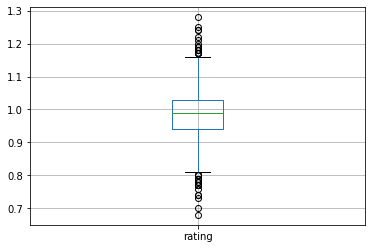

In [ ]:
df_noid.boxplot(column=['rating'])

3. Mencari Variant dan Standard Deviation

In [ ]:
df_noid[['rating']].var()

rating    0.005707
dtype: float64

In [ ]:
df_noid[['rating']].std()

rating    0.075545
dtype: float64

4. Tabel Frekuensi Negara Pemain

In [ ]:
df_noid['country'].value_counts()


United States    204
Brazil           138
Australia        134
Denmark          120
Russia           118
                ... 
Iraq               1
Azerbaijan         1
Uzbekistan         1
Italy              1
Greece             1
Name: country, Length: 72, dtype: int64

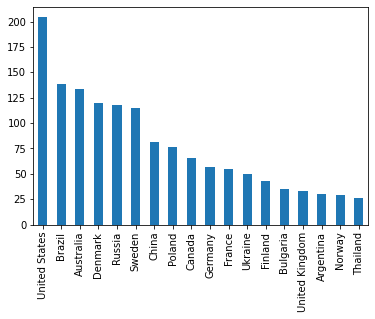

In [ ]:
df_noid.country.value_counts().sort_values(ascending=False)[:18].plot.bar()

# **3. Analisis Korelasi**

In [ ]:
df_noid.corr()

,total_maps,total_rounds,kd_diff,kd,rating
total_maps,1.000000,0.999800,0.443814,0.331059,0.303886
total_rounds,0.999800,1.000000,0.442883,0.330561,0.303443
kd_diff,0.443814,0.442883,1.000000,0.760398,0.732967
kd,0.331059,0.330561,0.760398,1.000000,0.981647
rating,0.303886,0.303443,0.732967,0.981647,1.000000


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


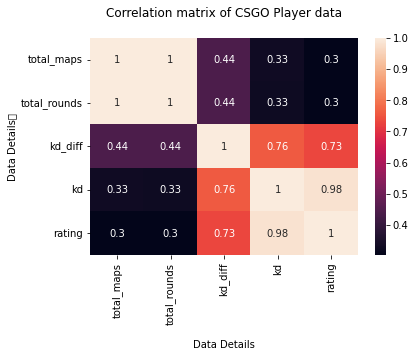

In [ ]:
hm = sns.heatmap(df_noid.corr(), annot = True)
hm.set(xlabel='\nData Details', ylabel='Data Details\t', title = "Correlation matrix of CSGO Player data\n")

plt.show()

**1. Hubungan korelasi `kd_diff` dan `kd`**

In [ ]:
df_noid[['kd', 'rating']].corr()

,kd,rating
kd,1.000000,0.981647
rating,0.981647,1.000000


(0.0, 1.3411862350987358)

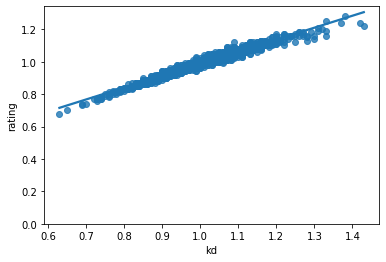

In [ ]:
sns.regplot(x='kd', y='rating', data=df_noid)
plt.ylim(0,)

**2. Hubungan korelasi `total_maps` dan `total_rounds`**

In [ ]:
df_noid[['total_maps', 'total_rounds']].corr()

,total_maps,total_rounds
total_maps,1.0000,0.9998
total_rounds,0.9998,1.0000


(0.0, 56920.95696811487)

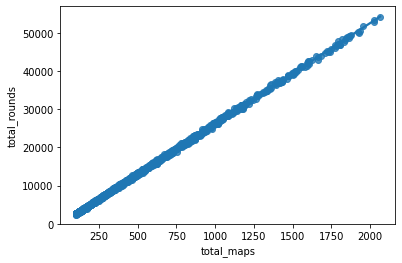

In [ ]:
sns.regplot(x='total_maps', y='total_rounds', data=df_noid)
plt.ylim(0,)

**3. Hubungan korelasi `total_rounds` dan `kd_diff`**

In [ ]:
df_noid[['total_rounds', 'kd_diff']].corr()

,total_rounds,kd_diff
total_rounds,1.000000,0.442883
kd_diff,0.442883,1.000000


(-5000.0, 8785.4)

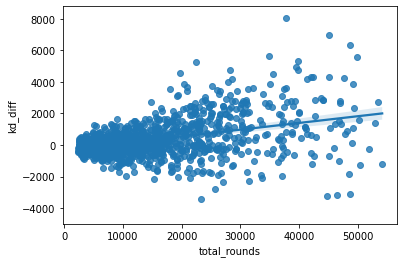

In [ ]:
sns.regplot(x='total_rounds', y='kd_diff', data=df_noid)
plt.ylim(-5000,)